In [1]:
from qiskit import QuantumCircuit, QuantumRegister

In [2]:
q0 = QuantumRegister(4, 'q0')

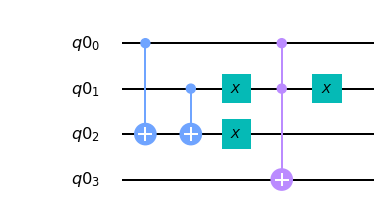

In [3]:
sub_circuit = QuantumCircuit(q0, name='Internal_Circuit')
sub_circuit.cx(q0[0],q0[2])
sub_circuit.cx(q0[1],q0[2])
sub_circuit.x(q0[2])
sub_circuit.x(q0[1])
sub_circuit.ccx(q0[0],q0[1],q0[3])
sub_circuit.x(q0[1])

sub_circuit.draw(output='mpl')

In [4]:
register = sub_circuit.to_instruction()

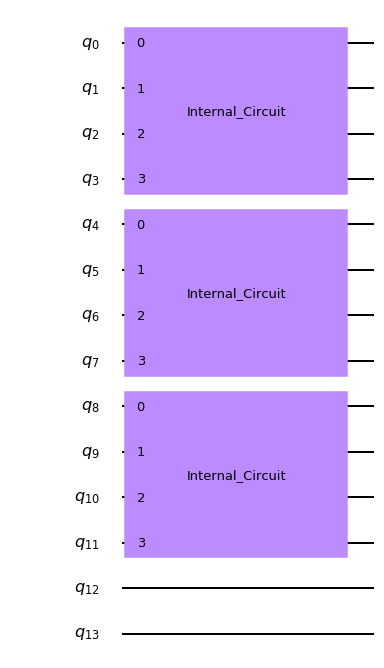

In [5]:
q = QuantumRegister(14, 'q')

a0 = QuantumCircuit(q)

for i in range(0,9,4):
    a0.append(register, [q[i],q[i+1],q[i+2],q[i+3]])

a0.draw(output='mpl')